<a href="https://colab.research.google.com/github/pds2021/a5-TJopp/blob/assignment_5/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Practical Data Science 20/21*
# Programming Assignment 5 - Create your own App

In this programming assignment you'll build a model that serves as a foundation for your own app. To this end, you will create your own dataset, build a deep learning model on this data, and deploy it!

In [27]:
!pip install -Uqq fastai  # upgrade fastai on colab

In [28]:
from fastai.vision.all import *
from fastai.vision.widgets import *

__Google Drive integration__

If you want to store and access your downloaded data for this assignment you can use the following code:

In [29]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir /content/drive/My\ Drive/pds_a5
%cd /content/drive/My\ Drive/pds_a5

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/content/drive/My Drive/pds_a5’: File exists
/content/drive/My Drive/pds_a5


## Develop an Application Idea

___Free your mind - this part is totally up to you.___

Think of an app that you'd like to build.
*   What useful app have you been missing?
*   Do you have any hobbies an app could be helpful for?
*   Is this a suitable classification or regression task? 
*   How could you get the data?


In [6]:
# Write down your app idea here
# die Edible Mushroom App finde ich richtig cool, daher baue ich auch so etwas nach → Zeile löschen

# es sollen die 3 folgenden Pferderassen erkannt werden:
# - Warmblüter (warmbloods): werden eher als Reitpferde eingesetzt
# - Kaltblüter (heavy horse): hohes Körpergewicht und ruhiges Temperament auszeichnen und als schwere Zugpferde eingesetzt werden
# - Vollblüter (thoroughbreds): Zuchtgeschichte geht auf arabische Pferde zurück

You can get an inspiration from these Apps:

<table>
<tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/5.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/400">Guitar Classifier</a> by Christian Werner</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/6.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/340">Healthy or Not!</a> by Nikhil Utane </td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/7.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/333">Hummingbird Classifier</a> by Nissan Dookeran</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/8.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/409">Edible Mushroom?</a> by Ramon</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/9.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/387">Cousin Recognizer</a> by Charlie Harrington</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/10.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/386">Emotion Classifier</a> by Ethan Sutin and Team 26</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/11.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/350">American Sign Language</a> by Keyur Paralkar</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/12.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/355">Your City from Space</a> by Henri Palacci</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/13.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/367">Univariate TS as images using Gramian Angular Field</a> by Ignacio Oguiza</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/14.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/348">Face Expression Recognition</a> by Pierre Guillou</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/15.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/352">Tumor-normal sequencing</a> by Alena Harley</td><td>  </td>
</tr><table>

## Creating your own Dataset

Now you need to construct a dataset that allows you to train a model for your app. You learned about how to create a dataset in Lecture 7.

Here, you can follow the steps from the lecture or look into the following ressources:

*   A [tool](https://github.com/toffebjorkskog/ml-tools/blob/master/gi2ds.md) for excluding irrelevant images from Google Image Search results beforehand by @melonkernel
*   See this [post](https://www.christianwerner.net/tech/Build-your-image-dataset-faster/) about an alternative image downloader/cleaner by @cwerner
*   Of course, you can use your own data/images :) 

### 1. Dowload the data 
- You may use the helper functions from the lecture to get the image URLs
- Create a new folder at your defined `path`
- Use `download_image` to download the images into the corresponding (sub-)directories

In [30]:
# Write your code here
# import pandas as pd

In [21]:
# df = pd.read_csv('https://github.com/ramonhollands/mushrooms/blob/master/mushrooms.csv')

Exception: ignored

In [22]:
# df.head()

,name,latin_name,description,eatable,poinson
0,champignon,Agaricus bisporus,https://en.wikipedia.org/wiki/Agaricus_bisporus,1,NaN
1,oesterzwam,Pleurotus ostreatus,https://en.wikipedia.org/wiki/Pleurotus_ostreatus,1,NaN
2,tropische beurszwam,Volvariella volvacea,https://en.wikipedia.org/wiki/Volvariella_volvacea,1,NaN
3,shiitake,Lentinus edodes,https://en.wikipedia.org/wiki/Shiitake,1,NaN
4,morielje,Gyromitra esculenta,https://en.wikipedia.org/wiki/Gyromitra_esculenta,1,NaN


In [51]:
import requests
import re
import json
from fastcore.foundation import L

def search_images_ddg(key,max_n=400):
    """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
    (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api and 
    https://github.com/fastai/fastbook/blob/master/utils.py)
    """
    url        = 'https://duckduckgo.com/'
    params     = {'q':key}
    res        = requests.post(url,data=params)
    searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
    if not searchObj: print('Token Parsing Failed !'); return
    requestUrl = url + 'i.js'
    headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0',
                 'referer': 'https://duckduckgo.com/'}
    params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
    urls       = []
    while True:
        try:
            res  = requests.get(requestUrl,headers=headers,params=params)
            data = json.loads(res.text)
            for obj in data['results']:
                urls.append(obj['image'])
                max_n = max_n - 1
                if max_n < 1: return L(set(urls))     # dedupe
            if 'next' not in data: return L(set(urls))
            requestUrl = url + data['next']
        except:
            pass

In [32]:
?search_images_ddg #löschen

In [71]:
#löschen
ims = search_images_ddg('thoroughbred')
len(ims)

361

In [72]:
#löschen
pd.DataFrame({'urls':ims})

,urls
0,http://images.photowall.com/products/51930/thoroughbred-horses-cuddling.jpg?w=620
1,http://www.pets4homes.co.uk/images/classifieds/2014/01/27/541176/large/thoroughbred-x-percheron-gelding-52e67d3ddf04b.jpg
2,http://www.petguide.com/wp-content/uploads/2016/07/thoroughbred-horse-1.jpg
3,https://thoroughbredadoption.com/wp-content/uploads/2016/12/abc-089.jpg
4,http://www.myhorse.ca/images/horse-thoroughbred-mare.jpg
...,...
356,http://2.bp.blogspot.com/-Yh08MaZhEUA/TilpdKPEVOI/AAAAAAAAAVw/Eyzps_AtIfo/s400/brown+thoroughbred+horse+%252817%2529.jpg
357,http://www.hanaeleh.org/wp-content/uploads/2016/11/DSC_3642.jpg
358,http://thumbs.dreamstime.com/z/beautiful-horse-chestnut-stallion-british-breed-thoroughbred-symbol-33406152.jpg
359,https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/thoroughbred-chestnut-mare-foal-the-irish-image-collection-.jpg


In [79]:
#löschen
dest = 'thoroughbred.jpg'
download_url(ims[2], dest)

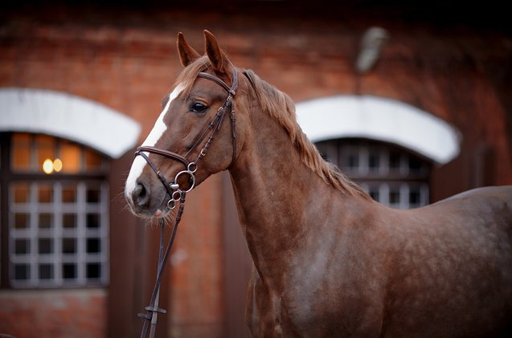

In [80]:
#löschen
im = Image.open(dest)
im.to_thumb(512,512)

In [53]:
horse_types = 'warmbloods','heavy horse','thoroughbred'
path = Path('horses')

In [54]:
if not path.exists(): path.mkdir()
for o in horse_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} horse')
    download_images(dest, urls=results) # convenience function, um Bilder herunterzuladen


 Download of https://amateurequestrian.com/wp-content/uploads/2018/01/don-quixote-candian-warmblood.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p horses/warmbloods
$ cd horses/warmbloods
$ wget -c https://amateurequestrian.com/wp-content/uploads/2018/01/don-quixote-candian-warmblood.jpg
$ tar xf don-quixote-candian-warmblood.jpg
 And re-run your code once the download is successful



(#1010) [Path('horses/warmbloods/00000003.jpg'),Path('horses/warmbloods/00000006.JPG'),Path('horses/warmbloods/00000009.JPG'),Path('horses/warmbloods/00000008.jpg'),Path('horses/warmbloods/00000001.jpg'),Path('horses/warmbloods/00000002.jpg'),Path('horses/warmbloods/00000005.jpg'),Path('horses/warmbloods/00000011.jpg'),Path('horses/warmbloods/00000000.jpg'),Path('horses/warmbloods/00000004.jpg')...]

### 2. Verify Images
- First, create a list of all your images
- Use `verify_images` and `unlink` to remove broken images

In [59]:
# Write your code here
fns = get_image_files(path)
fns # 1010 Bilder wurden heruntergeladen; nach unlink 999 Bilder

(#999) [Path('horses/warmbloods/00000003.jpg'),Path('horses/warmbloods/00000006.JPG'),Path('horses/warmbloods/00000009.JPG'),Path('horses/warmbloods/00000008.jpg'),Path('horses/warmbloods/00000001.jpg'),Path('horses/warmbloods/00000002.jpg'),Path('horses/warmbloods/00000005.jpg'),Path('horses/warmbloods/00000011.jpg'),Path('horses/warmbloods/00000000.jpg'),Path('horses/warmbloods/00000004.jpg')...]

In [57]:
failed = verify_images(fns)
failed # 11 Bilder wurden gefunden, die er nicht richtig laden kann

(#11) [Path('horses/warmbloods/00000166.jpg'),Path('horses/warmbloods/00000220.jpg'),Path('horses/warmbloods/00000342.jpg'),Path('horses/heavy horse/00000022.jpg'),Path('horses/heavy horse/00000060.png'),Path('horses/heavy horse/00000347.jpg'),Path('horses/thoroughbred/00000082.jpg'),Path('horses/thoroughbred/00000140.jpg'),Path('horses/thoroughbred/00000168.jpg'),Path('horses/thoroughbred/00000160.jpg')...]

In [58]:
failed.map(Path.unlink)

(#11) [None,None,None,None,None,None,None,None,None,None...]

### 3. Create the DataBlock
For this, you need to think of:
- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set

Use `RandomResizedCrop` for `item_tfms`with an image size of 224 px, and the appropriate `aug_transforms` as `batch_tfms`.

In [60]:
# Write your code here
horses = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(224),
    batch_tfms = aug_transforms()
)

### 4. Create the DataLoaders

In [62]:
# Write your code here
dls = horses.dataloaders(path)

### 5. Take a look at some of your pictures. 
Does everything look as expected?

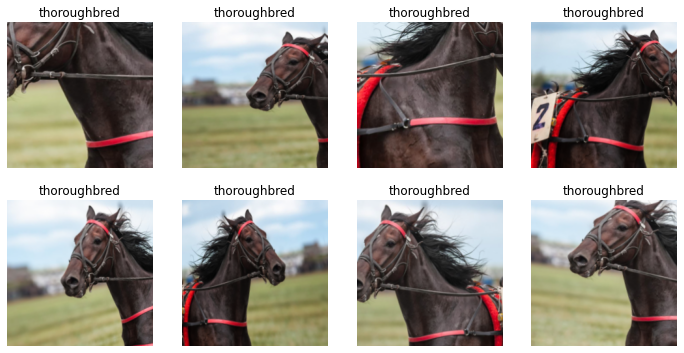

In [82]:
# Write your code here
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Modeling

### 6. Create a learner

Create an appropriate learner for your data
- Choose an appropriate model [architecture](https://fastai1.fast.ai/vision.models.html)
- Choose appropriate [metrics](https://docs.fast.ai/metrics.html) for your task

In [ ]:
# Write your code here

### 7. Fit the model

Use your knowdledge on model training to fit your model!

In [ ]:
# Write your code here

### 8. Evaluate the model

You' ve already seen many ways to evaluate a model. Evaluate your model in a qualitative and quantitative manner.

In [ ]:
# Write your code here

### 9. Clean your data

Based on the evaluation, you may want to clean your data using the `ImageClassifierCleaner`.
- Remeber to delete the selected data after using the cleaner:
    ```python
    for idx in cleaner.delete(): cleaner.fns[idx].unlink()
    ```
    
    
- Once we've cleaned up our data, we can retrain our model. 



In [ ]:
# Write your code here

## Turning Your Model into an Online Application

Now, take your app into production. You can follow the steps from the lecure:

- Export your model via `learn.export`
- Upload your model to [Github Releases](https://docs.github.com/en/free-pro-team@latest/github/administering-a-repository/about-releases) to make it publicly available at your repository.
- Create and upload a new notebook that only contains the necassary code and IPython widgets for your App. 
    - Remeber to download the exported model from *Github Releases*
    - Include a brief description of your app and the functionalities
- Publish your web app on [Binder](https://mybinder.org/) using Voilà

You can use the [example](https://github.com/pds2021/course/blob/main/nbs/07_Bear_App.ipynb) from the lecture as an orientation.

If you're familiar with the world of web application development, you're free to use these skills and all your tools and ressources!

In [ ]:
# Write your code here

## Finally, Provide a Link to Your App

In [ ]:
# Provide the link to your web app